<a href="https://colab.research.google.com/github/RandomAnass/Jupyter-books/blob/main/Functions%20comparing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let $I$ be an Interval in $\mathbb{R} $, and a function $f \colon I \to \mathbb{R} $. $f$ is : 
### Continuous on $I$ :
$\forall x \in I \; \forall \varepsilon > 0 \; \exists \delta > 0 \; \forall y \in I :  \, |x - y|<\delta \, \Rightarrow \, |f(x) - f(y)| < \varepsilon \,$
### Uniformly continuous on $I$ :
$ \forall \varepsilon > 0 \; \exists \delta > 0 \; \forall x, y \in I : \, |x - y|<\delta \, \Rightarrow \, |f(x)-f(y)|<\varepsilon$ \\

### Lipschitz continuous on $I$ :
$ \exists K > 0 \forall x, y \in I : \, |f(x)-f(y)|< K.|x - y| $
### Absolutely continuous on $I$ :
$ \forall \varepsilon > 0 \; \exists \delta > 0 \; \forall (x_k, y_k) \in I^{2}, x_k < y_k  : \, \sum_k (y_k - x_k) < \delta \, \Rightarrow \,  \sum_k | f(y_k) - f(x_k) | < \varepsilon$
 
### Differentiable on $I$ :
$\forall x \in I  \exists l \in \mathbb{R} \; \forall \varepsilon > 0 \; \exists \delta > 0 \; \forall y \in I :  \, |x - y|<\delta \, \Rightarrow \, |\frac{f(x)-f(y)}{x-y}-l| < \varepsilon \,$



## Examples : 
* **$tan$** is continuous but not uniformly continuous on $I=]\frac{-\pi}{2},\frac
{\pi}{2}[$. With $(x_n,y_n)=(\frac{\pi}{2}-\frac{1}{n},\frac{\pi}{2}-\frac{2}{n})$. \\
* **$exp$** is continuous but not uniformly continuous on $I=\mathbb{R} $. With $(x_n,y_n)=(n,n-\frac{1}{n})$ 

* **Weierstrass function** :$f(x)=\sum_{n=0} ^\infty a^n \cos(b^n \pi x),$ where $0<a<1$, $b$ is a positive odd integer, and: $ ab > 1+\frac{3}{2} \pi.$ is uniformly continuous but nowhere differentiable.

*  **Cantor function** is uniformly continuous but not absolutely continuous.
To formally define the Cantor function $c$ : [0,1] → [0,1], let $x$ be in [0,1] and obtain $c$($x$) by the following steps:
1. Express $x$ in base 3.  
2.   If $x$ contains a 1, replace every digit strictly after the first 1 by 0.
3.   Replace any remaining 2s with 1s.
4.   Interpret the result as a binary number. The result is $c$($x$). 

Because the Lebesgue measure of the Cantor set is 0, for any positive $\varepsilon$  &nbsp;<&nbsp;1 and $\delta$, there exists a finite sequence of pairwise disjoint sub-intervals with total length <&nbsp; $\delta$ over which the Cantor function cumulatively rises more than&nbsp;$\varepsilon$. In fact, for every  $\delta$ > 0 we can have:
$\sum\limits_{k=1}^M (y_k-x_k)<\delta$ and $\sum\limits_{k=1}^M (c(y_k)-c(x_k))=1$.

* **Square root** is  absolutely continuous but not Lipschitz continuous on $I=[0,\frac{1}{2}]$. 

### Weierstrass function 

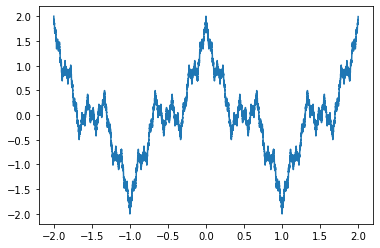

In [25]:
import numpy as np
import matplotlib.pyplot as plt

MyVar = 100000

startbee=-2
stopbee=2
bee = np.arange(startbee,stopbee,((stopbee-startbee)/MyVar))

def weierstrass(x,Nvar):
  we=np.zeros(MyVar)
  for n in range(0,Nvar):
    we=we+np.cos(3**n*np.pi*x)/2**n
  

  return we

plt.plot(bee,weierstrass(bee, 500))

plt.show()

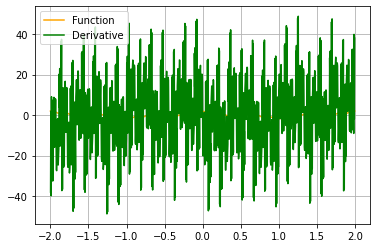

In [6]:
from scipy.misc import derivative
import numpy as np
import matplotlib.pyplot as plt

MyVar = 1000

# defining the function
def weierstrass(x,Nvar):
  we=np.zeros(MyVar)
  for n in range(0,Nvar):
    we=we+np.cos(3**n*np.pi*x)/2**n
  return we

def weierstrassderiv(x,Nvar):
  newx=[(x[i]+x[i+1])/2 for i in range(MyVar-1)]
  we=weierstrass(x, Nvar)
  dery=[(we[i]-we[i+1])/(x[i]-x[i+1]) for i in range(MyVar-1)]
  return newx, dery



# defininf x-axis intervals
y = np.linspace(-2, 2, num=MyVar)
Nvar=500 

# plotting its derivative
plt.plot(y, weierstrass(y,Nvar), color='orange', label='Function')
plt.plot(weierstrassderiv(y,Nvar)[0],weierstrassderiv(y,Nvar)[1], color='green', label='Derivative')  

# formatting
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

### Cantor function 

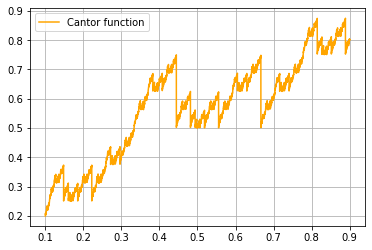

In [92]:
from decimal import *
getcontext().prec = 100
def base3int(x):
    x = int(x)
    L=[]
    exponents = range(int(math.log(x, 3)), -1, -1)
    for e in exponents:
        d = int(x // (3 ** e))
        x -= d * (3 ** e)
        L.append(str(d))
    return int(''.join(L))

def base3fraction(x, precision=100):
    L=[]
    x = x - int(x)
    exponents = range(-1, (-precision - 1) * 2, -1)
    for e in exponents:
        d = int(x // (3 ** e))
        x -= d * (3 ** e)
        L.append(str(d))
        if x == 0: break
    L.insert(0,"0")
    L.insert(1,".")
    return Decimal(''.join(L))

def base3(x):
  #to change
  return base3int(int(x))+base3fraction(x - int(x), precision=100)

def find_all(s, c):
    return [i for i, x in enumerate(s) if c == x ]


def parse_bin(s):
    t = s.split('.')
    return int(t[0], 2) + int(t[1], 2) / 2.**len(t[1])

def binaryToDecimal(binary, length) :
    point = binary.find('.')
    if (point == -1) :
        point = length
 
    intDecimal = 0
    fracDecimal = 0
    twos = 1
    for i in range(point-1, -1, -1) :
        intDecimal += ((ord(binary[i]) -
                        ord('0')) * twos)
        twos *= 2
    twos = 2
    for i in range(point + 1, length):     
        fracDecimal += ((ord(binary[i]) -
                         ord('0')) / twos);
        twos *= 2.0
    ans = intDecimal + fracDecimal    
    return ans


def cantor(x):
  y=str(base3fraction(x, precision=100))
  for i in find_all(y, '1'):
    list1 = list(y)
    try:
      list1[i+1] = '0' #limit
    except:
      pass
    finally:
      y = ''.join(list1)
  y=y.replace("2","1")
  z=binaryToDecimal(y,len(y))
  return z

X = np.linspace(0.1, 0.9, num=10000)
plt.plot(X, [cantor(x) for x in X], color='orange', label='Cantor function')

# formatting
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

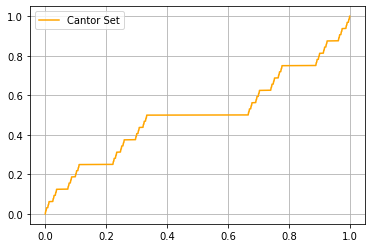

In [93]:
def cantor1(n):
    return [0.] + cant(0., 1., n) + [1.]

def cant(x, y, n):
    if n == 0:
        return []

    new_pts = [2.*x/3. + y/3., x/3. + 2.*y/3.]
    return cant(x, new_pts[0], n-1) + new_pts + cant(new_pts[1], y, n-1)

cantorset=cantor1(10)
plt.plot(cantorset,np.array(range(len(cantorset)))/len(cantorset) , color='orange', label='Cantor Set')

# formatting
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

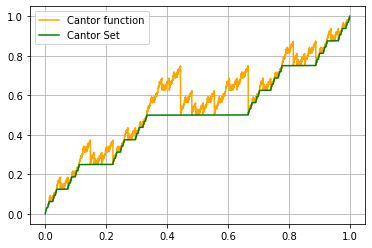

In [96]:
X = np.linspace(0.01, 0.999, num=10000)
plt.plot(X, [cantor(x) for x in X], color='orange', label='Cantor function')
cantorset=cantor1(10)
plt.plot(cantorset,np.array(range(len(cantorset)))/len(cantorset) , color='green', label='Cantor Set')
# formatting
plt.legend(loc='upper left')
plt.grid(True)

plt.show()